Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "DanilPeg"

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
from scipy.linalg import solve
import sympy as sym
import scipy.special as sp, scipy.integrate, scipy.linalg as lg

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [6]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = 0
    xn = x0
    niter = 0
    while (abs(x - xn) > eps) and (niter < maxiter):
        x = xn
        xn = x - f(x)/fder(x)
        niter += 1
    return xn, niter

In [7]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

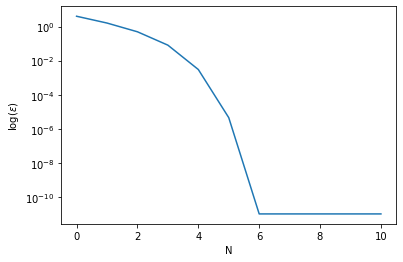

In [9]:
eps = []
N = np.arange(11)
for n in N:
  x, _ = newton_iteration(lambda x: x ** 2 - 1, lambda x: 2 * x, x0 = 5, maxiter=n)
  eps.append(abs(x - 1))
plt.plot(N, eps)
plt.yscale('log')
plt.xlabel("N")
plt.ylabel(r"$\log(\varepsilon)$")
plt.show()

In [ ]:
Сходимость метода - квадратичная. 

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [10]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = 0
    x_n = x0
    niter = 0
    while (abs(x - x_n) > eps) and (niter < maxiter):
        x = x_n
        x_n = x - m*f(x)/fder(x)
        niter += 1
    return x_n, niter

In [11]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [25]:
r = [0]*6
n = [0]*6
for i in range(6):
    r[i], n[i] = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 = -2, m = i+1, maxiter=10000)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', r[i], '\n')

m = 1 ,  iterations:  18 ,  root = -1.0000078296573287 

m = 2 ,  iterations:  5 ,  root = -1.000000000000001 

m = 3 ,  iterations:  17 ,  root = -0.9999978588127855 

m = 4 ,  iterations:  10000 ,  root = -2.0 

m = 5 ,  iterations:  10000 ,  root = 0.19108037789347976 

m = 6 ,  iterations:  10000 ,  root = -0.21179652171229435 



In [26]:
r = [0]*6
n = [0]*6
for i in range(6):
    r[i], n[i] = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 =8, m = i+1, maxiter=10000)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', r[i], '\n')

m = 1 ,  iterations:  23 ,  root = 1.0000091359761536 

m = 2 ,  iterations:  7 ,  root = 1.0000000000000213 

m = 3 ,  iterations:  18 ,  root = 0.9999979839700615 

m = 4 ,  iterations:  10000 ,  root = 8.0 

m = 5 ,  iterations:  10000 ,  root = -2.013327200268916 

m = 6 ,  iterations:  10000 ,  root = 0.6275338563438377 



In [28]:
r = [0]*6
n = [0]*6
for i in range(6):
    r[i], n[i] = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 4*x*(x**2 - 1), x0 = 10, m = i+1, maxiter=10000)
    print('m =', i+1,',', ' iterations: ', n[i],',', ' root =', r[i], '\n')

m = 1 ,  iterations:  24 ,  root = 1.0000078664191003 

m = 2 ,  iterations:  7 ,  root = 1.0000000000139897 

m = 3 ,  iterations:  17 ,  root = 1.0000021115603943 

m = 4 ,  iterations:  10000 ,  root = 10.000000000000036 

m = 5 ,  iterations:  10000 ,  root = -14.89307397642465 

m = 6 ,  iterations:  10000 ,  root = -1.7086314071621609 



Да, тесты показывают, если m равно кратности корня, получаем наилучшую сходимость для разных начальных точек. А как раз $m = 2$
обладает квадратичной сходимостью.

# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


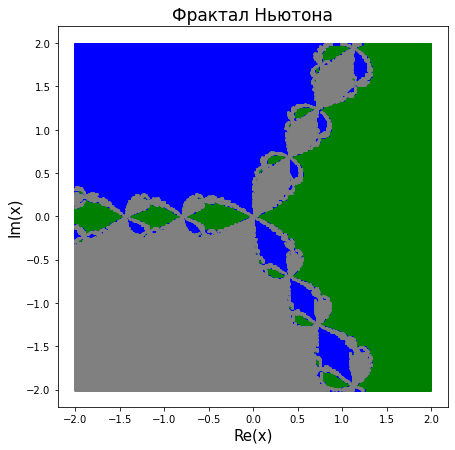

In [44]:
import cmath
res = 600 
n = 2 
r1 = np.zeros((1,2))
r2 = np.zeros((1,2))
r3 = np.zeros((1,2))
for i in range(res):
    for k in range(res):
        
        x = 2  * n * i / res - n
        y = 2 * n * k / res - n
        r, n1 = newton_iteration(lambda x: x ** 3 - 1, lambda x: 3 * x ** 2, x + y * 1j)
        dr1 = abs(r - 1)
        dr2 = abs(r - cmath.e ** (2 / 3 * cmath.pi * 1j))
        dr3 = abs(r - cmath.e ** (4 / 3 * cmath.pi * 1j))
        delta = min(dr1, dr2, dr3)
        if delta == dr1:
            r1 = np.append(r1, [[x, y]], axis=0)
        elif delta == dr2:
            r2 = np.append(r2, [[x, y]], axis=0)
        else:
            r3 = np.append(r3, [[x, y]], axis=0)
plt.figure(figsize=(7,7))
plt.xlabel('Re(x)', fontsize=15)
plt.ylabel("Im(x)", fontsize=15)
plt.title("Фрактал Ньютона", fontsize=17)
plt.plot(r1[1:,0], r1[1:,1], 'o', ms=2, color="green")
plt.plot(r2[1:,0], r2[1:,1], 'o', ms=2, color="blue")
plt.plot(r3[1:,0], r3[1:,1], 'o', ms=2, color="grey")

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [51]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_n = X0
    error = 1000
    i = 0
    while error >= eps and i < maxiter:
        x = x_n
        dx = lg.solve(jcb(x), F(x))
        x_n = x - dx
        error = np.linalg.norm(x_n-x)
        i += 1
    x, niter = x_n, i
    return x, niter

In [52]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [58]:
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    r"""Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    x1, x2, x3 = sym.symbols('x1 x2 x3')
    f1, f2, f3 = func2([x1, x2, x3])
    f_ = sym.Matrix([f1, f2, f3])
    J = f_.jacobian([x1, x2 ,x3])
    J_func = sym.lambdify((x1, x2, x3), J)
    return J_func(*X)

In [59]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [ ]:
# more testing in this cell, keep it intact
